In [2]:
import numpy as np 
import pandas as pd 

In [4]:
data = pd.read_excel('/Users/romanzinchenko/Downloads/data.xlsx')
data.head()

,user_id,utilization_date,cost_of_utilization,LTV_forecast
0,12345,2020-01-01 00:00:00.000,407.139370,592.860630
1,12346,2020-01-01 02:32:34.903,377.797379,622.202621
2,12347,2020-01-01 04:57:36.087,412.545913,587.454087
3,12348,2020-01-01 05:52:06.719,393.563618,606.436382
4,12349,2020-01-01 08:08:58.564,388.459055,611.540945


In [5]:
data.tail()

,user_id,utilization_date,cost_of_utilization,LTV_forecast
8862,15934,2020-08-02 15:26:28.995,455.190159,544.809841
8863,15935,2020-08-02 17:36:37.248,449.919131,550.080869
8864,15936,2020-08-02 17:54:30.596,415.532335,584.467665
8865,15937,2020-08-02 20:07:57.209,442.972369,557.027631
8866,15938,2020-08-02 21:56:26.523,415.813331,584.186669


In [7]:
data.shape

(8867, 4)

In [8]:
pd.DataFrame([{'Клиенты': len(data['user_id'].value_counts()),    
               'Дата и время привлечения': len(data['utilization_date'].value_counts()),
               'Стоимость привлечения': len(data['cost_of_utilization'].value_counts()), 
               'Прогноз_LTV': len(data['LTV_forecast'].value_counts())
              }], 
             columns = ['Клиенты', 'Дата и время привлечения',  'Стоимость привлечения', 'Прогноз_LTV'], index = ['Количество'])

,Клиенты,Дата и время привлечения,Стоимость привлечения,Прогноз_LTV
Количество,3810,3810,3810,3810


In [9]:
print('Количество дубликатов: {}'.format(data.duplicated().sum()))
print('Таблица данных: строк, столбцов', data.shape)

Количество дубликатов: 5057
Таблица данных: строк, столбцов (8867, 4)


In [10]:
data['id-date'] = data['user_id'].map(str) + data['utilization_date'].map(str)
data.head(3)

,user_id,utilization_date,cost_of_utilization,LTV_forecast,id-date
0,12345,2020-01-01 00:00:00.000,407.139370,592.860630,123452020-01-01 00:00:00
1,12346,2020-01-01 02:32:34.903,377.797379,622.202621,123462020-01-01 02:32:34.903000
2,12347,2020-01-01 04:57:36.087,412.545913,587.454087,123472020-01-01 04:57:36.087000


In [12]:
pd.DataFrame([{'id-date': len(data['id-date'].value_counts())
              }], columns = ['id-date'], index = ['Количество'])

,id-date
Количество,3810


In [13]:
data.drop_duplicates(subset=['id-date'], inplace = True) 
print('Таблица данных: строк, столбцов', data.shape)

Таблица данных: строк, столбцов (3810, 5)


In [14]:
data['month_year'] = pd.to_datetime( data[ 'utilization_date' ]).dt.to_period( 'M' )

Text(0, 0.5, 'количество клиентов')

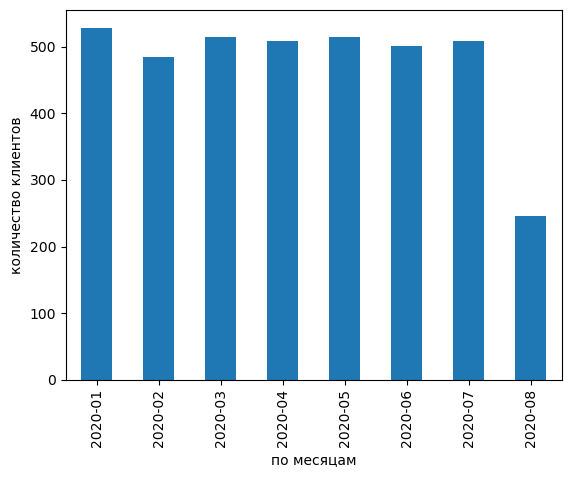

In [15]:
from matplotlib import pyplot as plt
data.groupby(['month_year'])['user_id'].nunique().plot.bar()
plt.xlabel('по месяцам')
plt.ylabel('количество клиентов')

Text(0, 0.5, 'стоимость привлечения')

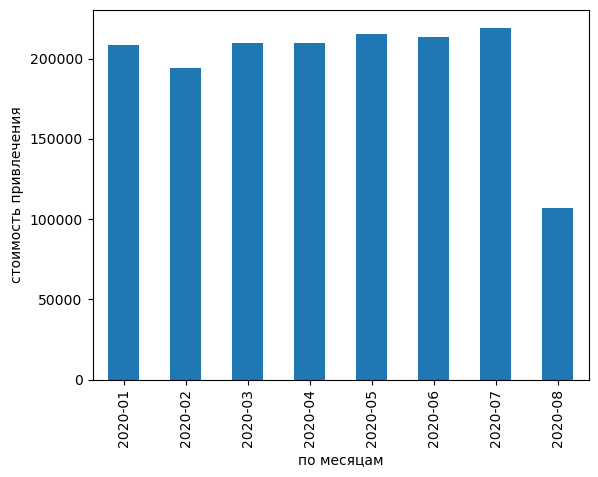

In [16]:
data.groupby(['month_year'])['cost_of_utilization'].sum().plot.bar() 
plt.xlabel('по месяцам') # подпишем оси
plt.ylabel('стоимость привлечения')

Text(0, 0.5, 'Прогноз LTV')

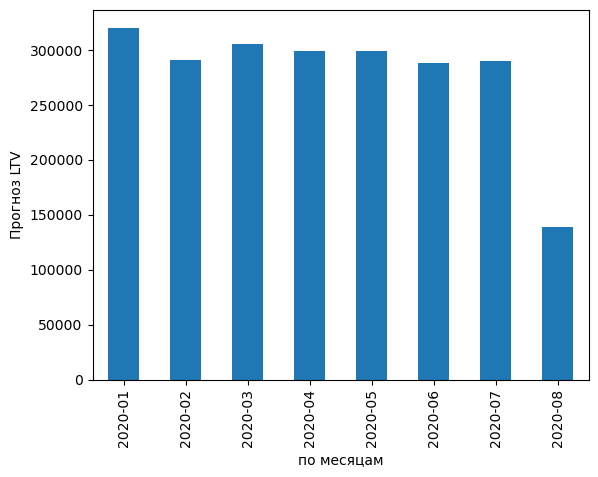

In [18]:
data.groupby(['month_year'])['LTV_forecast'].sum().plot.bar()
plt.xlabel('по месяцам')
plt.ylabel('Прогноз LTV')

In [19]:
monthly = data.groupby(['month_year']).agg({'user_id': ['count'], 'cost_of_utilization': ['sum'],
                                       'LTV_forecast': ['sum']})
monthly.columns = monthly.columns.map(' '.join).str.strip()
monthly = monthly.reset_index(level='month_year')
monthly ['month_year'] = monthly ['month_year'].map(str)
print (monthly)

  month_year  user_id count  cost_of_utilization sum  LTV_forecast sum
0    2020-01            529            208439.999275     320560.000725
1    2020-02            485            193973.065914     291026.934086
2    2020-03            515            209645.818806     305354.181194
3    2020-04            509            209601.483031     299398.516969
4    2020-05            515            215513.018028     299486.981972
5    2020-06            502            213590.792713     288409.207287
6    2020-07            509            219305.994314     289694.005686
7    2020-08            246            107096.531052     138903.468948


In [20]:
monthly ['средняя стоимость привлечения'] = monthly['cost_of_utilization sum'] /  monthly['user_id count'] 
monthly ['средний прогноз LTV'] = monthly['LTV_forecast sum'] /  monthly['user_id count']
monthly.drop(['user_id count',  'cost_of_utilization sum',  'LTV_forecast sum'], axis = 1, inplace = True)
print (monthly)

  month_year  средняя стоимость привлечения  средний прогноз LTV
0    2020-01                     394.026464           605.973536
1    2020-02                     399.944466           600.055534
2    2020-03                     407.079260           592.920740
3    2020-04                     411.790733           588.209267
4    2020-05                     418.471880           581.528120
5    2020-06                     425.479667           574.520333
6    2020-07                     430.856570           569.143430
7    2020-08                     435.351752           564.648248


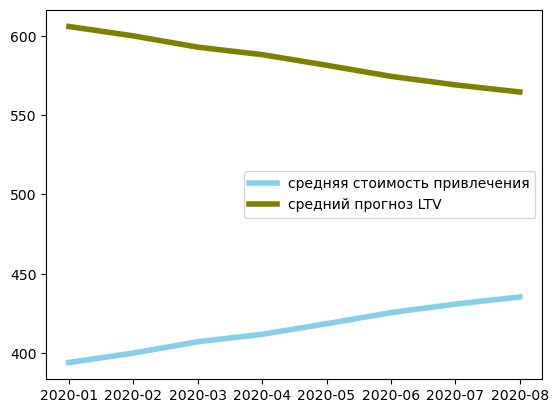

In [21]:
plt.plot( 'month_year', 'средняя стоимость привлечения', data = monthly, color = 'skyblue', linewidth = 4)
plt.plot( 'month_year', 'средний прогноз LTV', data = monthly, color = 'olive', linewidth = 4)
plt.legend()

## Выводы
Необходимо уточнить процедуры ETL, поскольку данные содержат много дубликатов, что может исказить результаты анализа. Кроме того, следует обратить внимание на то, что средняя стоимость привлечения клиента значительно выросла за 7 месяцев с 394 до 430, т.е. на почти 10%. Одновременно с этим, прогноз среднего LTV снизился с 605 до 564, т.е. на 6.66%. Эти факторы указывают на порчу клиентской базы, что требует изменений.